# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [194]:
#import the libraries

import matplotlib as plt
import pandas as pd

In [195]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('googleplaystore_v2.csv')
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [196]:
#Check the shape of the dataframe

print(inp0.columns)
# print(len(inp0.columns))
inp0.shape

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [197]:
#Check the datatypes of all the columns of the dataframe

inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [198]:
#Check the number of null values in the columns

inp0.isna().any(axis = 0)
inp0.isna().sum()

# Rating is the target variable
# Handling missing values for rating
#  - Ratings is the target variable
#  - drop the records

# Rating has 1474 null values
# Tyoe has 1 null value
# Content Rating has 1 null value
# Current Ver has 8 null values
# Android Ver has 3 null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [199]:
#Drop the rows having null values in the Rating field

# inp0.dropna(subset = ['Rating'])

inp1 = inp0[~inp0['Rating'].isna()]

#Check the shape of the dataframe

inp1.shape

(9367, 13)

In [200]:
# Check the number of nulls in the Rating field again to cross-verify
# inp0.isna()
inp1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [201]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values

inp1.isna().sum().sum()

8

In [202]:
type(inp1)

pandas.core.frame.DataFrame

In [203]:
#Inspect the nulls in the Android Version column 

# inp1[inp1['Android Ver'].isna() == True]


# values haru shift vako vanya yo row ma ho
# inp0[inp0['Category'] == '1.9']

# inp0[inp0['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

# inp0.iloc[10472, :]



In [204]:
inp1[(inp1['Android Ver'].isna())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [205]:
#Drop the row having shifted values

# inp0.drop([10472], inplace = True) 3 yesari nagarne conditional subsetting use garne

# inp0.drop( labels = [], inplace  = True)

#Check the nulls againin Android version column to cross-verify

# inp0[inp0['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

# inp0[inp0['Android Ver'].isna() == True]

inp1 = inp1[~((inp1['Android Ver'].isna()) & (inp1['Category'] == '1.9'))] # ~ ra conditional subsetting use garne 

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [206]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [207]:
#Check the most common value in the Android version column

# inp1['Android Ver'].unique()
# len(inp1['Android Ver'].unique())

inp1['Android Ver'].value_counts()
inp1['Android Ver'].mode()
inp1['Android Ver'].mode()[0] # gives the string value of the result of the mode()

'4.1 and up'

In [208]:
#Fill up the nulls in the Android Version column with the above value

# inp1[inp1['Android Ver'].isna()] = '4.1 and up' yesari nagarne

inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0], inplace = True)

In [209]:
inp1[inp0['Android Ver'].isna()] 

inp1['Android Ver'].isna().any()

inp1['Android Ver'].isna().sum()

0

In [210]:
#Check the nulls in the Android version column again to cross-verify

# inp1.info()

inp1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [211]:
#Check the nulls in the entire dataframe again

inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [212]:
#Check the most common value in the Current version column

inp1['Current Ver'].value_counts() 
inp1['Current Ver'].mode()[0]

'Varies with device'

In [213]:
#Replace the nulls in the Current version column with the above value

inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0], inplace = True)

In [214]:
# Question : Check the most common value in the Current version column again

# inp1.info()

inp1['Current Ver'].isna().any()

inp1['Current Ver'].isna().sum()

inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [215]:
# Imputations are generally done when keeping the missing values disbars you from doing further analysis and eliminating the
# rows containing those values leads to some bias. The estimation is based on the mean, mode, median, etc. of the data.
# In cases where there are numerical columns involved, both mean and median offer up as a good imputed value. In the case 
# of the categorical column, mode turns out to be a decent enough imputation to carry out.

#### Handling Incorrect Data Types 

In [216]:
#Check the datatypes of all the columns 

inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [217]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 

inp1[inp1['Android Ver'] == '4.1 and up']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28000.0,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000.0,"10,000,000+",Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5500.0,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000.0,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
20,Logo Maker - Small Business,ART_AND_DESIGN,4.0,450,14000.0,"100,000+",Free,0,Everyone,Art & Design,"April 20, 2018",4.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8600.0,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7400.0,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [218]:
#Analyse the Price column to check the issue

# inp1.groupby('App')['Price'].mean() # yo garda error au6 kinaki dtype of price col is str

# inp1['Price'].mean()

# inp1['Price'].value_counts()[1:]
inp1['Price'].value_counts()[0:]

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [219]:
#Write the function to make the changes

inp1['Price'] = inp1['Price'].apply(lambda x: 0 if x == '0' else float(x[1:]))


In [220]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [221]:
#Verify the dtype of Price once again

# inp0.value_counts()
inp1['Price'].dtype

dtype('float64')

In [222]:
#Analyse the Reviews column

# inp0.info()

# inp0['Reviews'].dtype

inp1['Reviews'].value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [223]:
#Change the dtype of this column

inp1['Reviews'] = inp1['Reviews'].astype(int)
inp1['Reviews'].dtype
inp1.info()

#Check the quantitative spread of this dataframe

inp1['Reviews'].describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [224]:
#Analyse the Installs Column

inp1['Installs'].dtype
inp1.info()
inp1['Installs'].describe()
inp1['Installs'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [225]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.

inp1['Installs'] = inp1['Installs'].str.replace('[,+]', '')
inp1['Installs'] = inp1['Installs'].astype(int)



In [226]:
inp1.info()
inp1['Installs'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [227]:
inp1['Installs'].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [228]:
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.733753,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21305.040123,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [229]:
#Perform the sanity checks on the Reviews column

inp1['Rating'].describe()
# the mean is between 1 and 5
# min is 1 and max is 5

# number of reviews is given by the Reviews column and the number of installs is given by the Installs column
inp1[inp1['Reviews'] > inp1["Installs"]].shape
inp1[inp1['Reviews'] > inp1["Installs"]]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [230]:
# Now lets drop these records

# inp0.drop(labels = [2454, 4663, 5917, 6700, 7402, 8591, 10697],  inplace = True)

inp1 = inp1[inp1['Reviews'] <= inp1['Installs']] # delete garnai par6 vanne xaina conditional subsetting garda ni hun6

In [231]:
# for free apps the price shouldnt be > 0

inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


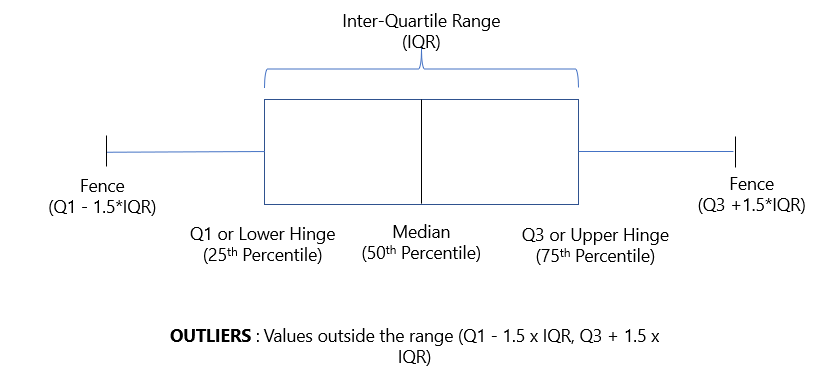

In [232]:
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,9359.000000,9.359000e+03,9359.000000,9.359000e+03,9359.000000
mean,4.191174,5.144332e+05,22710.768864,1.791083e+07,0.961116
std,0.514966,3.145187e+06,21311.274234,9.127102e+07,15.822478
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.870000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.960000e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.164100e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [233]:
#perform the sanity checks on prices of free apps 

inp1[(inp1['Price'] > 0) & (inp1['Type'] == 'Free')].shape

(0, 13)

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [234]:
#import the plotting libraries

import matplotlib.pyplot as plt



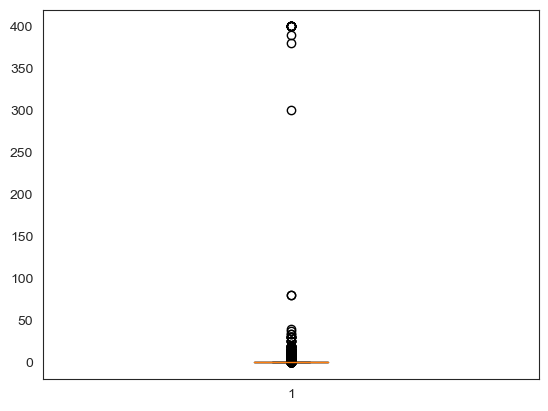

In [235]:
#Create a box plot for the price column

plt.boxplot(inp1['Price']);

In [236]:
#Check the apps with price more than 200

inp1[inp1['Price'] > 200]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [237]:
#Clean the Price column

inp1 = inp1[inp1['Price'] < 200]

inp1['Price'].value_counts() # dherai jasto apps free chan
inp1['Price'].describe()

# So quartiles haru 0 chan, kinaki dherai jasto apps haru 25%,50%,75% samma par6n



count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

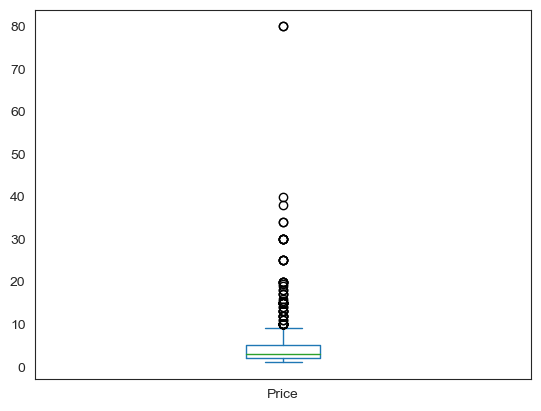

In [238]:
#Create a box plot for paid apps

inp1[inp1['Price']>0].Price.plot.box();

In [239]:
#Check the apps with price more than 30

inp1[inp1['Price'] > 30]



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [240]:
# https://www.anodot.com/blog/quick-guide-different-types-outliers/

# Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go
# ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
# In the former case, you should determine whether or not removing them would add value to your analysis procedure.

In [241]:
#Clean the Price column again

inp1 = inp1[inp1['Price'] <= 30]

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

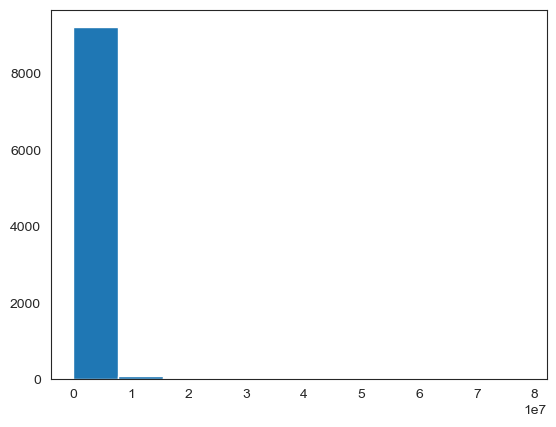

In [242]:
#Create a histogram of the Reviews

plt.hist(inp1['Reviews']);

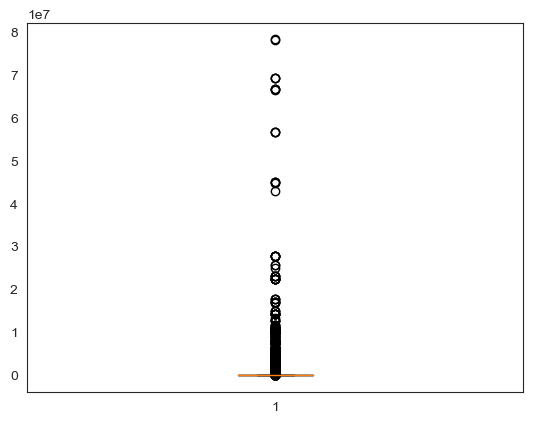

In [243]:
#Create a boxplot of the Reviews column

plt.boxplot(inp1['Reviews']);

In [244]:
#Check records with 1 million reviews

inp1[inp1['Reviews'] == 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [245]:
#Drop the above records

inp1 = inp1[inp1['Reviews'] <= 1000000]
inp1.shape


(8634, 13)

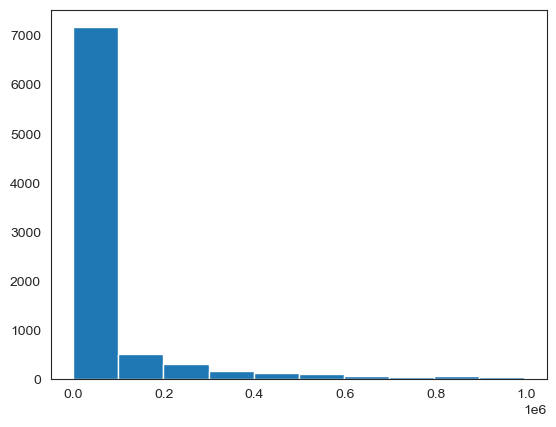

In [246]:
#Question - Create a histogram again and check the peaks

plt.hist(inp1['Reviews']);

In [247]:
#Question - Create a box plot for the Installs column and report back the IQR
# subtracting 25th percentile value from the 75th percentile 

inp1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [248]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs

inp1 = inp1[inp1['Installs'] <= 100000000]
inp1.shape

(8624, 13)

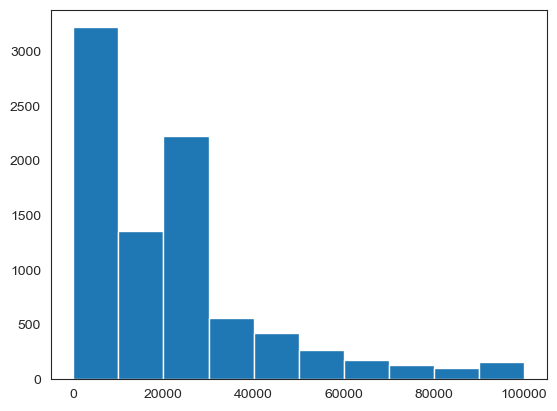

In [249]:
#Plot a histogram for Size as well.

plt.hist(inp1['Size']);

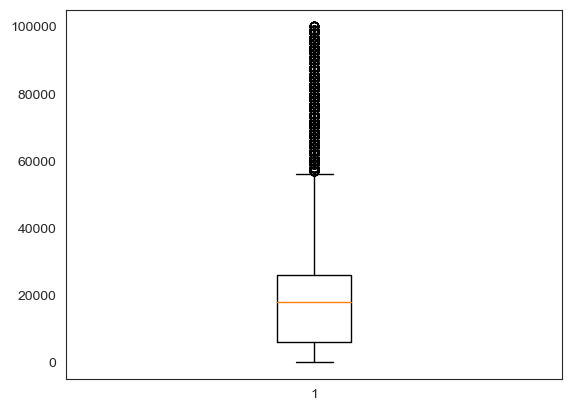

In [250]:
#Question - Create a boxplot for the Size column and report back the median value

plt.boxplot(inp1['Size']); # median value is near 20000

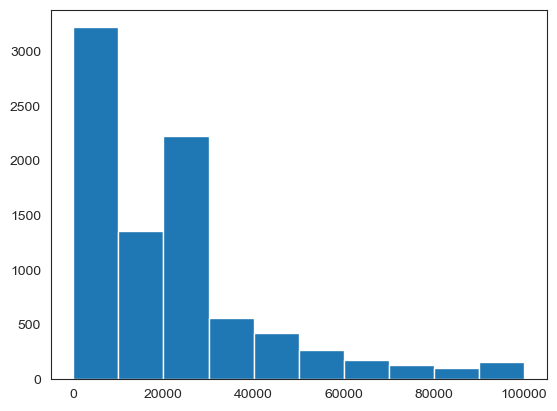

In [251]:
plt.hist(inp1.Size);

In [252]:
# A Histogram plots the frequency of a numeric variable, whereas the Bar plot shows the aggregation of a certain numerical
# entity for some categorical variable. In Situation A, you are analysing the total sum of runs, which is a numeric variable
# for all the teams, which is a categorical variable. Hence it will need a bar plot. For Situation B, you're understanding the
# spread of a numeric variable by checking the frequency. Hence a histogram will be used here.

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [253]:
#import the necessary libraries

# unnecessary waarnings hataune
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

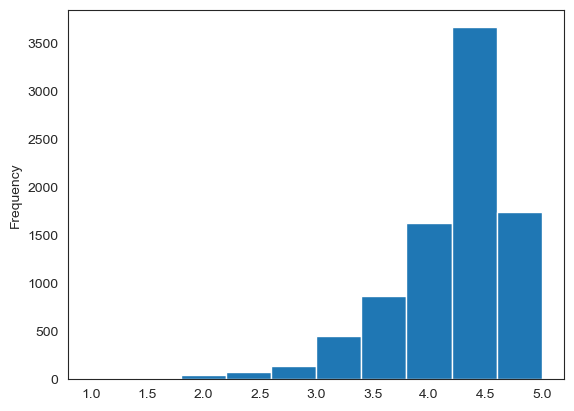

In [254]:
#Create a distribution plot for rating

inp1.Rating.plot.hist();

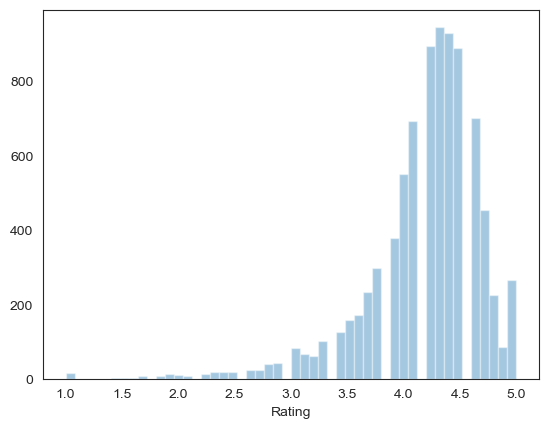

In [255]:
#Change the number of bins

sns.distplot(inp1.Rating, kde = False); # kde  = kernel density estimate
# here there is a probability distribution curve
# there is density instead of freuency
# The KDE parameter in the distplot checks whether a Gaussian Density Estimate is required or not. 

In [256]:
# The difference arises due to the fact that instead of calculating the ‘frequency’, the distplot in Seaborn directly
# computes the probability density for that rating bucket. And the curve (or the KDE as noted in the documentation for Seaborn)
# that gets drawn over the distribution is the approximate probability density curve.*

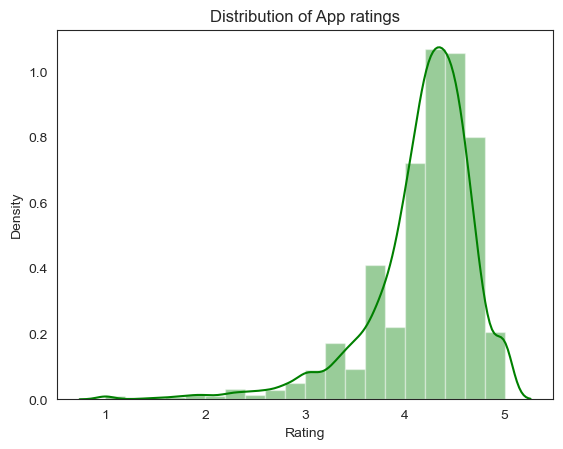

In [257]:
#Change the colour of bins to green

sns.distplot(inp1.Rating, bins = 20, color =  'g'); # bich ko ga hatauna bins use garne, green ko satta g lekhda ni hun6
plt.title('Distribution of App ratings', fontsize = 12);

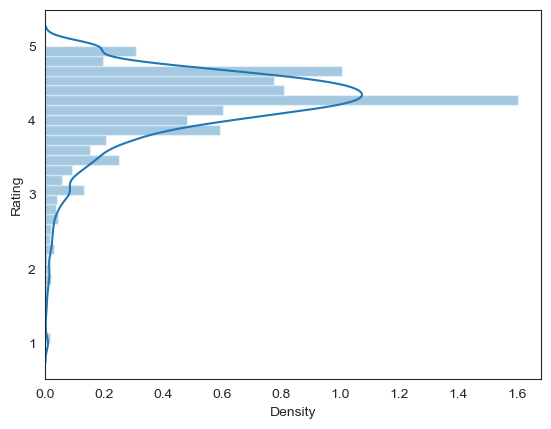

In [258]:
sns.distplot(inp1.Rating, bins = 30,  vertical = True);

In [259]:
#Apply matplotlib functionalities



In [260]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

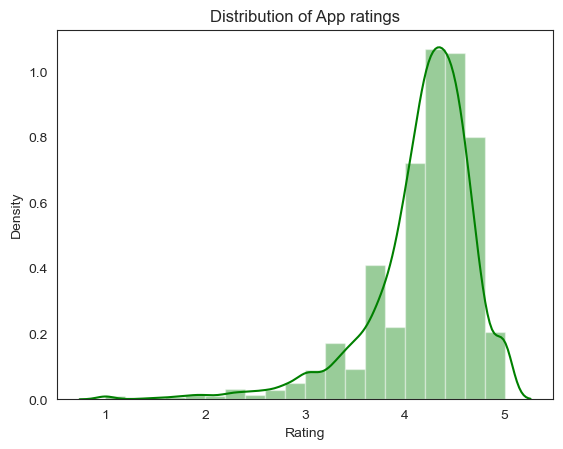

In [261]:
# style must be one of white, dark, whitegrid, darkgrid, ticks
# sns.set_style('dark')
sns.set_style('white')
sns.distplot(inp1.Rating, bins = 20, color =  'g'); # bich ko ga hatauna bins use garne, green ko satta g lekhda ni hun6
plt.title('Distribution of App ratings', fontsize = 12);

In [262]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

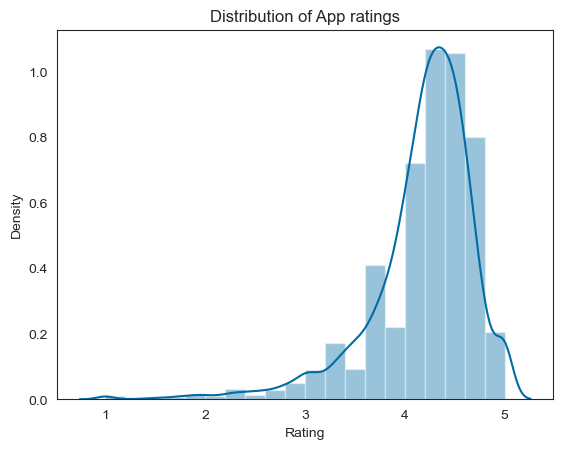

In [263]:
plt.style.use('tableau-colorblind10')
sns.distplot(inp1.Rating, bins = 20); # bich ko ga hatauna bins use garne, green ko satta g lekhda ni hun6
plt.title('Distribution of App ratings', fontsize = 12);

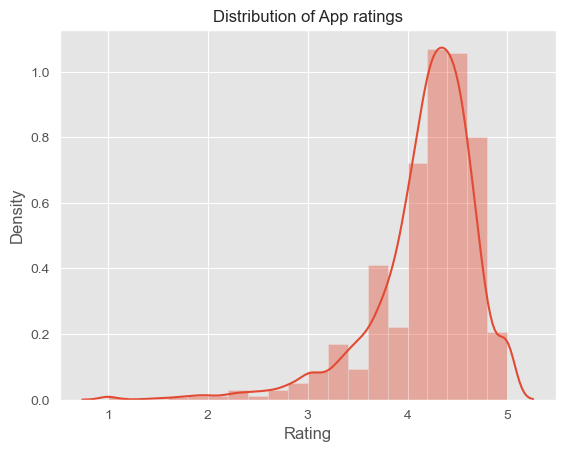

In [264]:
plt.style.use('ggplot')
sns.distplot(inp1.Rating, bins = 20); # bich ko ga hatauna bins use garne, green ko satta g lekhda ni hun6
plt.title('Distribution of App ratings', fontsize = 12);

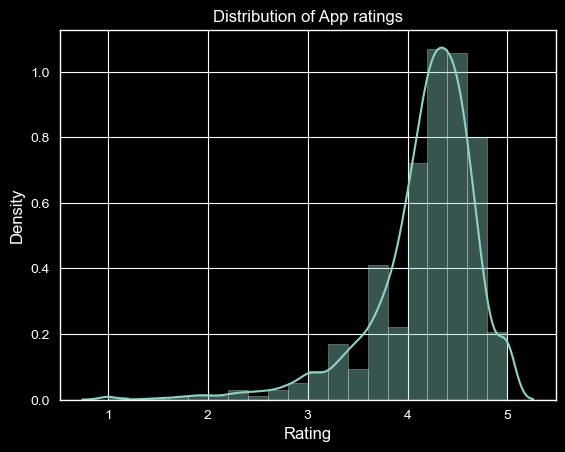

In [265]:
plt.style.use('dark_background')
sns.distplot(inp1.Rating, bins = 20); # bich ko ga hatauna bins use garne, green ko satta g lekhda ni hun6
plt.title('Distribution of App ratings', fontsize = 12);

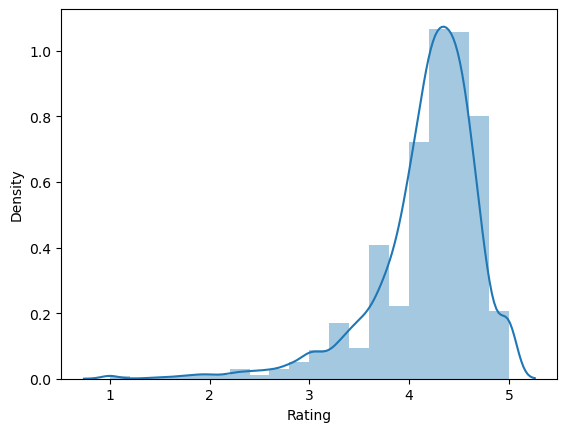

In [266]:
plt.style.use('default')
# %matplotlib.inline

sns.distplot(inp1.Rating, bins = 20);

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [267]:
#Check all the styling options

In [268]:
#Change the number of bins to 20


#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [269]:
# ailesamma numeric columns ma deal garyathyaum, for category columns we take the aggregate &  plot it using the piechart 

In [270]:
#Analyse the Content Rating column

inp1['Content Rating'].value_counts()

# yaha k cha vane adults only and 18+ ra unrated ma dherai values nai chainan so yo falde pani kei farak pardaina
# 3-4 wata values le k na hun6 ra analysis
# Adults only 18+       3
# Unrated               1

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [271]:
#Remove the rows with values which are less represented 


# inp1['Content Rating'].isin(['Adults only 18+', 'Unrated'])

inp1 = inp1[~((inp1['Content Rating'] == 'Adults only 18+') | (inp1['Content Rating'] == 'Unrated'))]
# yo garda dherai columns hat6
# so kati index haru exist hun6n but 

inp1.info() # yo garda sabai columns not null chan so tesko matlab dataframe continuous cha
# yadi chaina vaena vane reset_index garne
#  If you see a RangeIndex and the range corresponds to the number of entries in your DataFrame, then the index is continuous.
# aile Int64Index: 8620 entries, 0 to 10840 dekhaira6 yesko matlab vaneko yo contiguous ho
# vannale  the index seems to have gaps or irregularities, 
# due to Adults only ra unrated values vako records haru include nagareko/ drop gareko hunale
# yadi continuguous vako vae Int64Index: 8620 entries, 0 to 8621
# remember, entries vaneko records/rows ho
# remember Int64Index vaneko number of indices ho 
# yadi yesto vae continuous banauna indexlai reset garne inplace garne ra drop = True garne kinakai old indexlai naline vanekoho
# drop = True garda tyo non contiguous index lai  default integer-based index le replace gar6
#  default integer-based index vaneko 0 dekhi suru vaera 1 le baddai jane index ho

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8620 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int32  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 875.5+ KB


In [272]:
inp1.shape

(8620, 13)

In [273]:
#Reset the index

inp1.reset_index(inplace = True, drop = True)

In [274]:
inp1.info() # aba contiguous vayo index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int32  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 808.2+ KB


In [275]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int32  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 808.2+ KB


In [276]:
#Check the apps belonging to different categories of Content Rating 

inp1['Content Rating'].value_counts()

Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

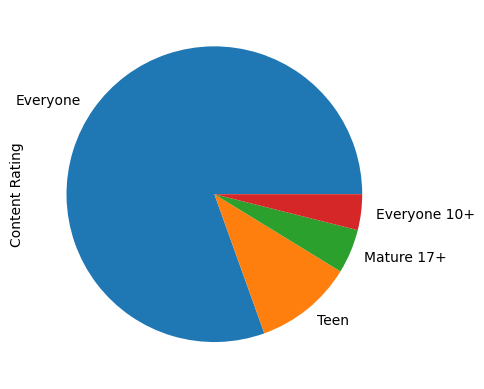

In [277]:
#Plot a pie chart

inp1['Content Rating'].value_counts().plot.pie();
# rato ta hariyo ma kun dherai vanera patta launa sakindaina yaha bata
# so pie chart  is not a good measure

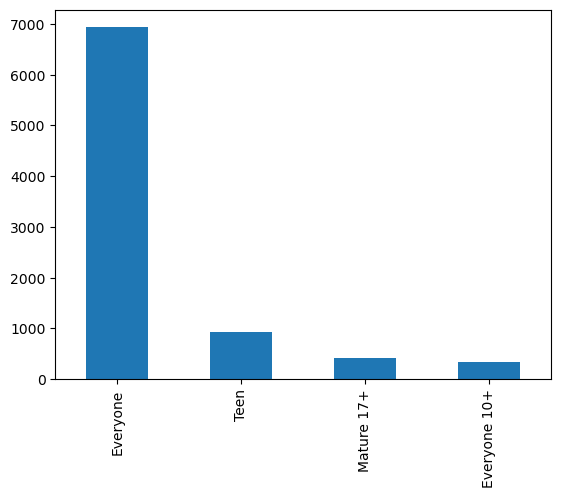

In [278]:
#Plot a bar chart

inp1['Content Rating'].value_counts().plot.bar();

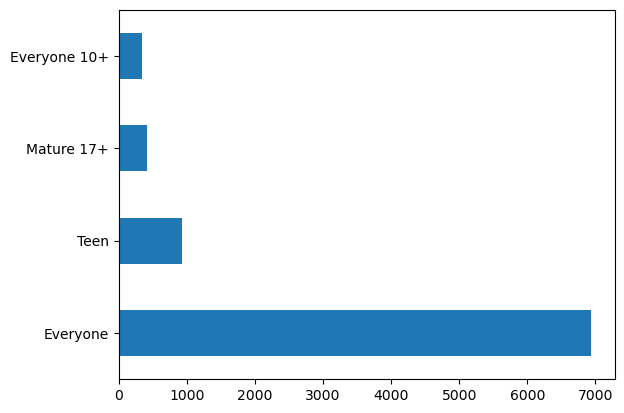

In [279]:
inp1['Content Rating'].value_counts().plot.barh();

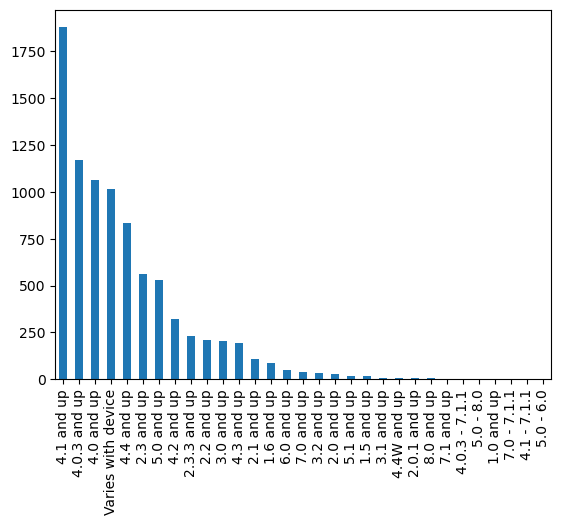

In [280]:
#Question - Plot a bar plot for checking the 4th highest Android version type

# inp1['Android Ver'].value_counts()
inp1['Android Ver'].value_counts().plot.bar();

In [281]:
# for a categorical column we use bar plot
# for two numerical columns we use scatter plot

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

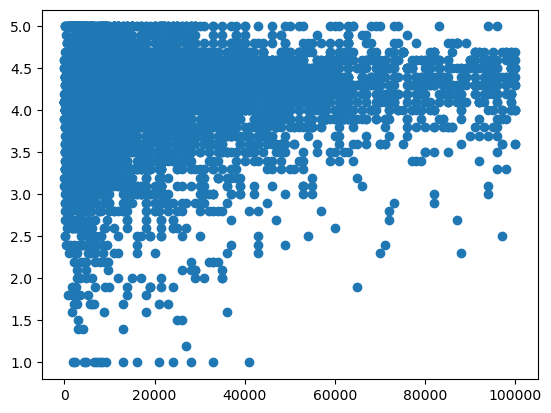

In [282]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating

plt.scatter(inp1.Size, inp1.Rating); # matplotlib ko scatterplot vaneko seabornma jointplot ho

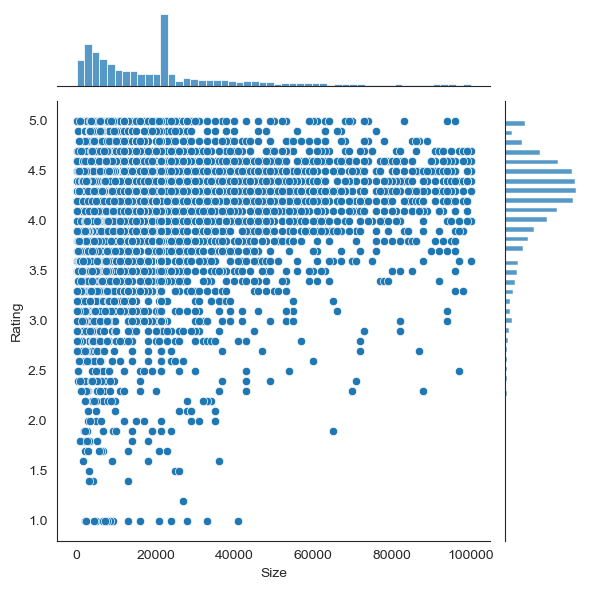

In [283]:
### Plot the same thing now using a jointplot

# ?sns.jointplot

sns.set_style('white')

sns.jointplot(inp1.Size, inp1.Rating, ); # histogram of these both columns pani din6 eutai figure ma
# yo histogram hatauna mildaina

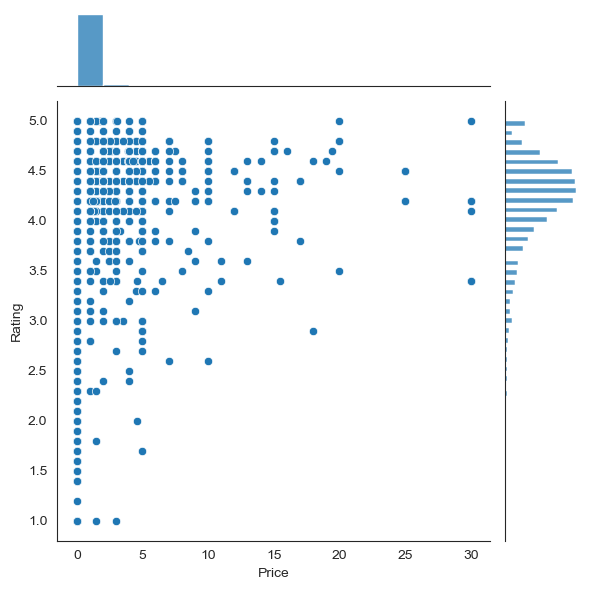

In [284]:
## Plot a jointplot for Price and Rating

    sns.jointplot(inp1.Price, inp1.Rating);
# yesbata tetti clear va6aina, tesaile euta line vae ajhai clear hunthyo, tesaile hamile regression plot use garchau

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

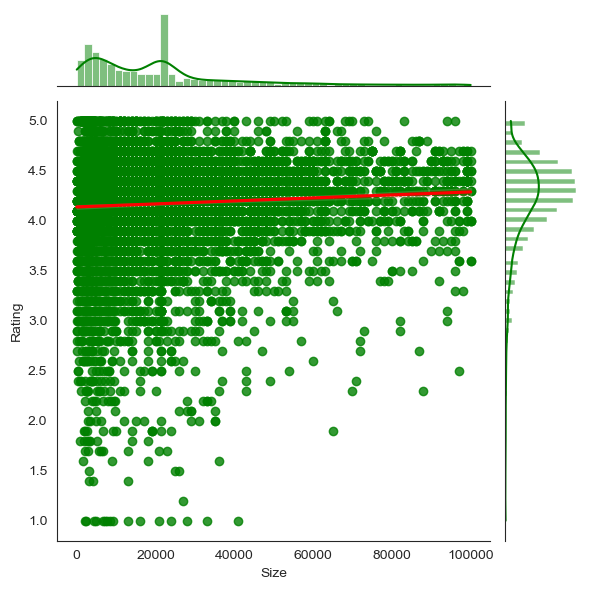

In [285]:
##Plot a reg plot for Price and Rating and observe the trend
# regression plot
sns.jointplot(inp1.Size, inp1.Rating, kind = 'reg', color  = 'g', line_kws = {'color' : 'red'});

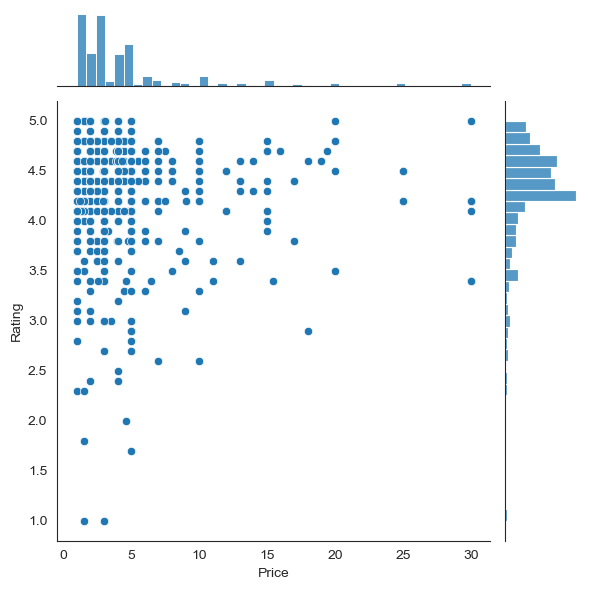

In [286]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.

sns.jointplot(inp1[inp1['Type'] == 'Paid']['Price'], inp1[inp1['Type'] == 'Paid']['Rating']);

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

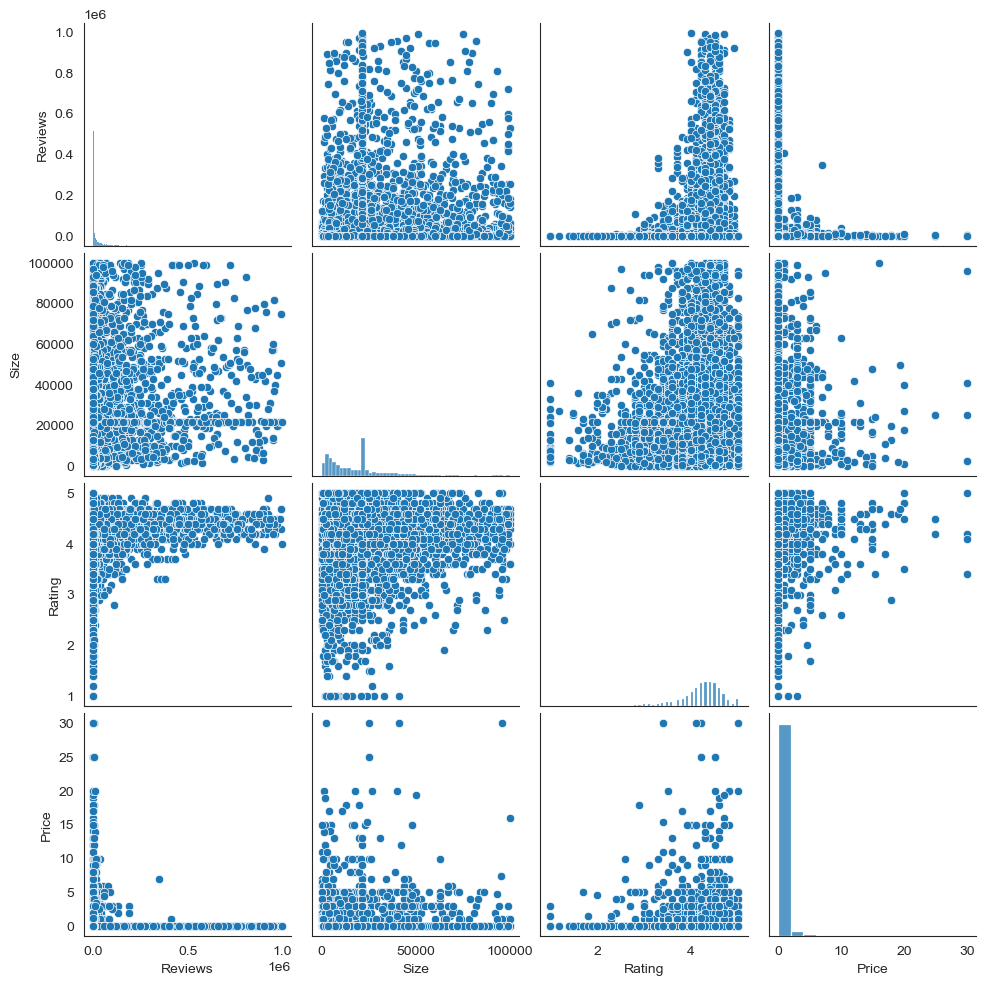

In [287]:
## Create a pair plot for Reviews, Size, Price and Rating

sns.pairplot(inp1[['Reviews', 'Size','Rating','Price']]);

In [288]:
# Pairplots instantly give you the relationship between one numeric variable with the rest of the numeric variables.
# This is pretty useful in identifying relationships between the target variable and the rest of the features.
# For example, say you want to predict how your company’s sales are affected by budgets allocated to three different types of 
# advertisement channels - TV, Newspaper and Radio. In order to choose, you need to create a pair plot containing profits and
# the three different budgets as the variables. 
# pairplot([['Sales', 'TV', 'Radio', 'Newspaper']])
# It is clearly visible that the left-most factor or budget allocated to TV is the most prominently related to the
# company's Sales since you can clearly ascertain a trend between them - increase in budgets for TV ads leads to more sales,
# whereas the points are scattered quite randomly in the latter two cases.

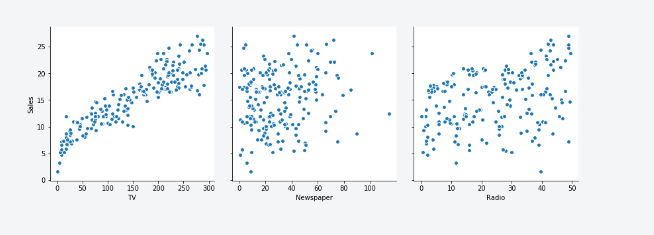

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

In [289]:
# ailesamma numerical features ko herirathyaum
# aba numerical ra character features ko herneboxplot used for plotting numerical variable across several categories. 
# boxplot used for plotting numerical variable across several categories. 
# the groupby function, the bar graph can be used to compare the mean, median, sum and several other metrics.

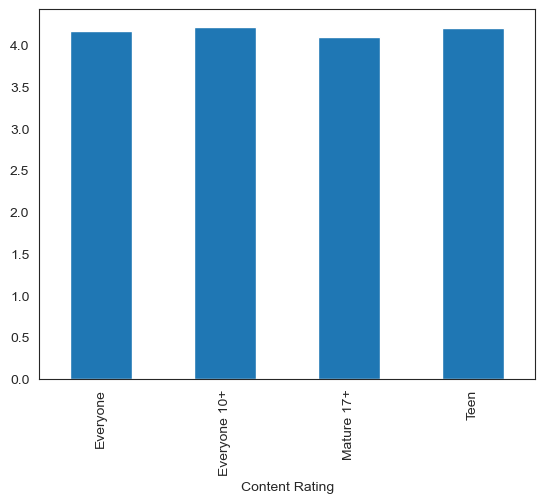

In [290]:
##Plot a bar plot of Content Rating vs Average Rating 

inp1.groupby('Content Rating')['Rating'].mean().plot.bar();

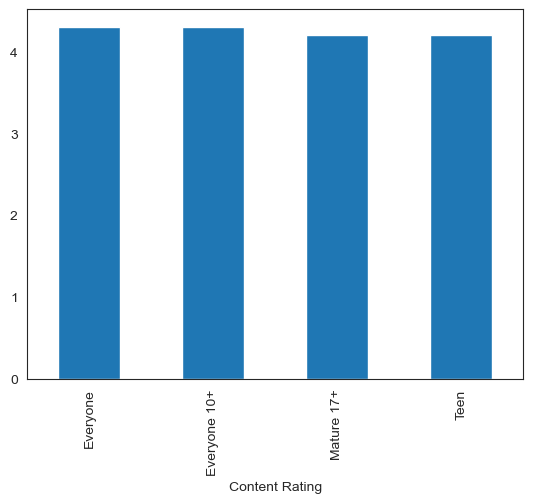

In [291]:
##Plot the bar plot again with Median Rating

inp1.groupby(['Content Rating'])['Rating'].median().plot.bar();

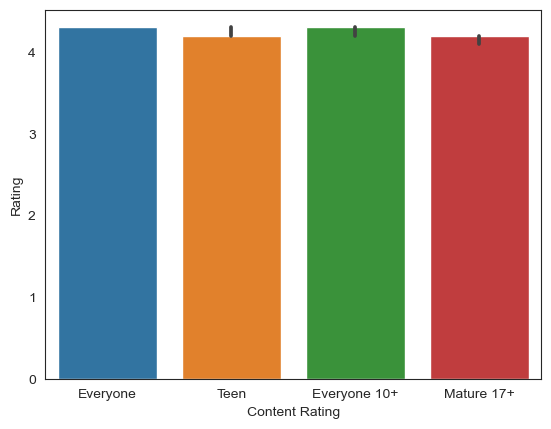

In [292]:
##Plot the above bar plot using the estimator parameter

import numpy as np
sns.barplot(data = inp1, x = 'Content Rating', y = 'Rating', estimator = np.median); # snsma data garera garne barplot/boxplotma

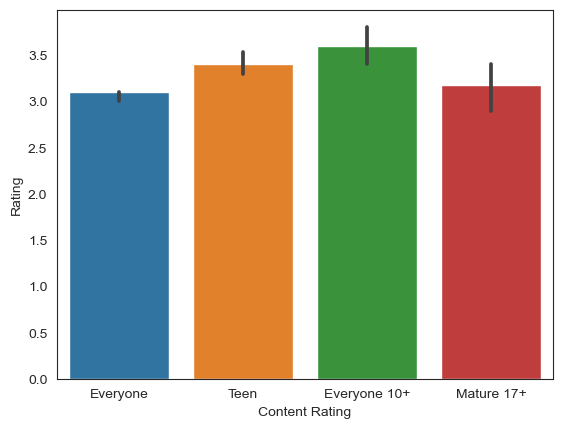

In [293]:
##Plot the bar plot with only the 5th percentile of Ratings

# mathi ko barplot garda kunai ma pani clear distinction aaena so vaena. 
# so aba hami sabai quartile ko satta 5% quartile matrai lium. ie. 0.05.

sns.barplot(data = inp1, x = 'Content Rating', y = 'Rating', estimator = lambda x: np.quantile(x, 0.05));

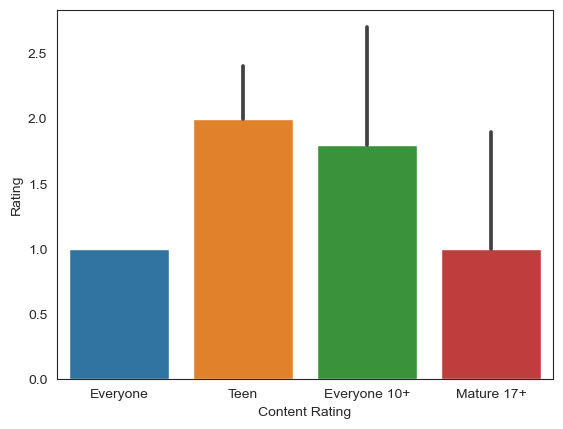

In [294]:
##Question - Plot the bar plot with the minimum Rating

# Change the estimator function in the graph above to analyse minimum Rating for each of the different categories of
# ‘Content Rating’. Which category has the highest minimum rating?

# sns.barplot(data = inp1, x = 'Content Rating', y = 'Rating', estimator = lambda x: np.quantile(min(x), 0.05));
sns.barplot(data = inp1, x = 'Content Rating', y = 'Rating', estimator = np.min);


__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




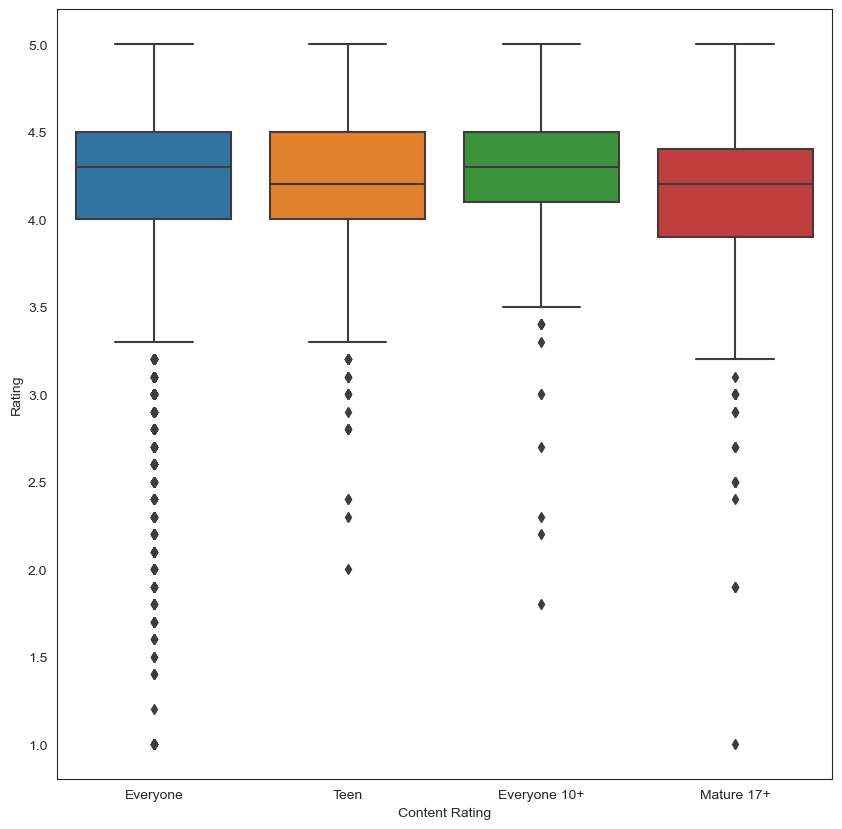

In [295]:
##Plot a box plot of Rating vs Content Rating

# numerical vs catgorical columns ko lagi plot yiniharule nagarda hun6. ramrari analysis garna sakindaina.
# boxplot nai use garne

plt.figure(figsize = [10, 10])

sns.boxplot(data = inp1, x = 'Content Rating', y = 'Rating');

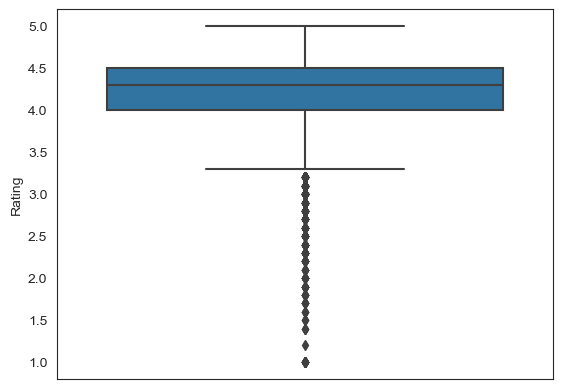

In [296]:
##Question - Plot a box plot for the Rating column only

sns.boxplot(data = inp1,  y = 'Rating');

# https://www.youtube.com/watch?v=eUkgf-2NVO8

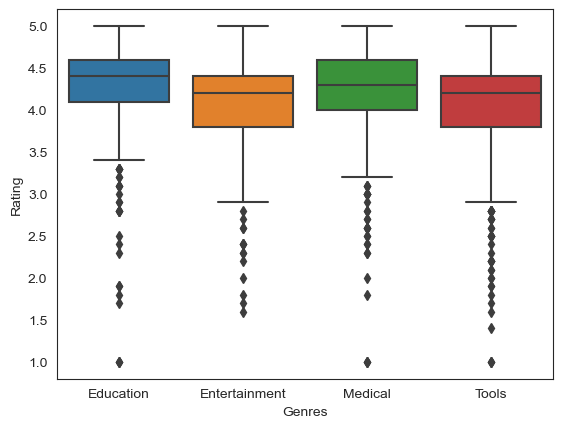

In [297]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres

inp1['Genres'].value_counts()[:4]
# sns.boxplot(inp1[inp1['Genres'].isin(['Tools', 'Entertainment', 'Education', 'Medical'])]['Rating']);
inp1_ratings = inp1[inp1['Genres'].isin(['Tools', 'Entertainment', 'Education', 'Medical'])]
sns.boxplot(data = inp1_ratings, x = 'Genres', y = 'Rating');
# Education category has the highest rating


In [298]:
# yadi 3 wata columns chan vane heat map nai use garne

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [299]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut

# size column ko harek value lai label garne
# jaile ni 5 wata sizeko category nai ta hune ho 
# 8.7 mb vaneko VL ra 19mb vaneko M gardeko cha so raamrari nai gareko cha
inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL', 'L', 'M', 'H', 'VH'])
# yaha size vanne numerical variable lai categorical variable ma convert garyaum by bucketing a specific range of values

# This is binning, where you convert a numeric variable to a categorical variable by bucketing a specific range of values.
# This is pretty useful during analyses where you can create useful buckets and analyse how some other variable changes across 
# those buckets.
# One of the most common examples of binning happens in demographic survey datasets (like Census or Market research surveys) 
# that contain the Age column, where people can be categorised as Under-12, 12-17, 18-24 & so on. Despite the actual age of the
# person being a numeric value, it's much easier to analyse across buckets and gather insights( like asking how many people in
# the 12-17 age bucket have gone to school, how many of them prefer a particular brand over the other and so on).
# the pd.qcut method, which divided the entire Size column to the following buckets on the basis of the percentiles.
# Note that pd.qcut takes percentile values in decimals, as in 20th percentile becomes 0.2, 40th percentile becomes 0.4 & so on

# Percentile Range  Binned Category
#-------------------------------------
# (0,20]            Very Low (VL)
# (20,40]           Low(L)
# (40,60]           Medium (M)
# (60,80]           High(H)
# (80,100]          Very High(VH)

inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [300]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
# rating vaneko target variable vayo

# ?pd.pivot_table

pd.pivot_table(data = inp1, index = 'Content Rating', columns = ['Size_Bucket'], values = 'Rating')
# herda ta the mean is not the best 


Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215784,4.170799,4.187302
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


In [301]:
##Change the aggregation to median


pd.pivot_table(data = inp1, values = 'Rating', index = 'Content Rating', columns = ['Size_Bucket'], aggfunc = np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [302]:
##Change the aggregation to 20th percentile

pd.pivot_table(data = inp1, values = 'Rating', index = 'Content Rating', columns = ['Size_Bucket'],\
               aggfunc = lambda x: np.quantile(x, 0.2)) # 20th percentile of the ratings

# thisis the part where we are making the grid for heat map

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


In [303]:
# aba yo grid banyo whcih is exactly what we need to make a heatmap

In [304]:
##Store the pivot table in a separate variable


res = pd.pivot_table(data = inp1, values = 'Rating', index = 'Content Rating', columns = ['Size_Bucket'],\
               aggfunc = lambda x: np.quantile(x, 0.2)) # 20th percentile of the ratings

In [305]:
?sns.heatmap

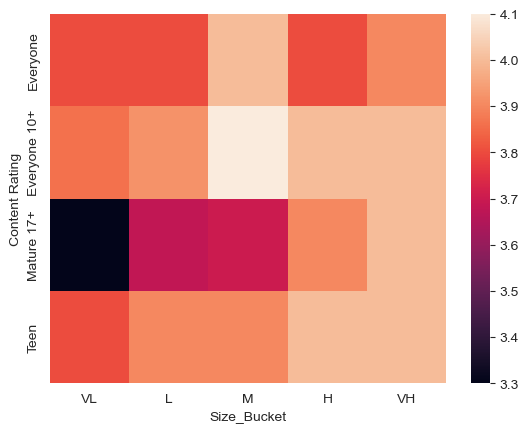

In [306]:
##Plot a heat map

sns.heatmap(res);

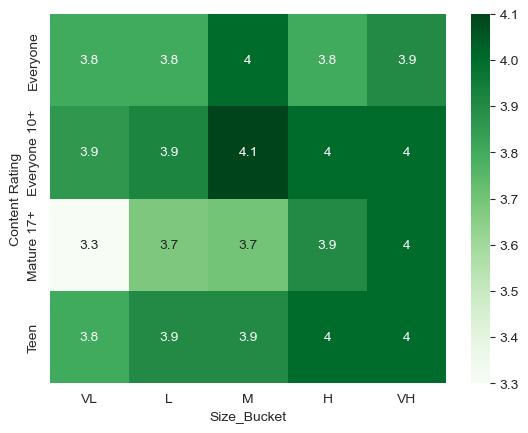

In [307]:
##Apply customisations
# higher values lai mathi parne
sns.heatmap(res, cmap = 'Greens', annot = True);

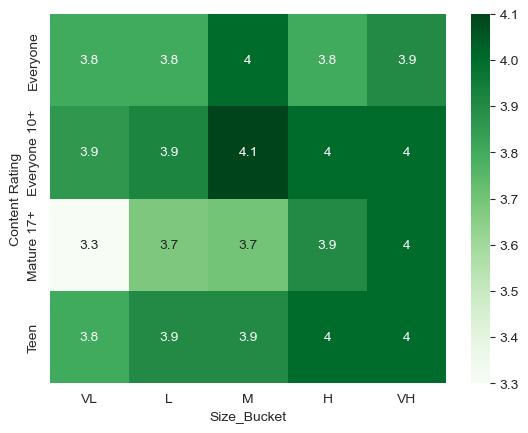

In [327]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating


inp1['Reviews_Bucket'] = pd.qcut(inp1.Reviews, q = [0, 0.2, 0.4, 0.6, 0.8, 1 ] , labels = ['VL', 'L', 'M', 'H', 'VH'])

res1 = pd.pivot_table(data = inp1, values = 'Rating', index = 'Content Rating', columns = ['Size_Bucket'],\
               aggfunc = lambda x: np.quantile(min(x), 0.2)) # 20th percentile of the ratings
sns.heatmap(res, cmap = 'Greens', annot = True);

In [328]:
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
Reviews_Bucket    category
updated_month        int64
dtype: object

In [ ]:
# aba time anusar ni herum

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [330]:
## Extract the month from the Last Updated Date

# app haru update vaepaxi ko ratings haru kasto cha herne
# aba yo last upodated column ko dtype str cha, teslai datetime ma lagnuparyo, tespaxi tesbata month lai extract garnuparyo
inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket,Reviews_Bucket,updated_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,L,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,L,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,VH,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H,VH,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL,L,6


In [331]:
## Find the average Rating across all the months

inp1.groupby('updated_month')['Rating'].mean()

updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

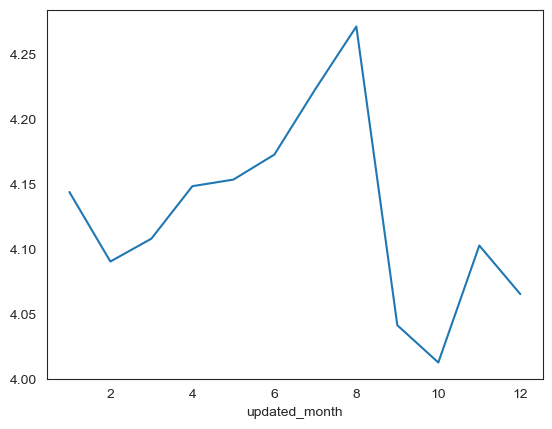

In [333]:
## Plot a line graph

inp1.groupby('updated_month')['Rating'].mean().plot.line();
# ratings are high in 6-8 months

# Line charts are more or less utilised only for time-series data.
# Therefore, you’ll be using them predominantly while working on forecasting and other time series models.

In [334]:
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
Reviews_Bucket    category
updated_month        int64
dtype: object

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [ ]:
# you learnt how to analyse categorical variables using a bar chart.
# You can also add another categorical variable to the mix and analyse it even further with the help of a stacked bar chart.
# In the following demonstration, you’ll be creating a stacked bar chart by comparing Installs across the different months
# and different categories of Content Rating.

In [336]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs

pd.pivot_table(inp1, columns = 'Content Rating', index = 'updated_month', values = 'Installs', aggfunc = np.sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733712e+08,23300000.0,5259000.0,1.616194e+08
5,1.861068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427171e+09,317727100.0,145257200.0,4.157166e+08
7,7.771110e+09,456556000.0,419491910.0,1.943557e+09
8,5.930943e+09,215821000.0,312981700.0,1.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


In [344]:
##Store the table in a separate variable

monthly = pd.pivot_table(inp1, columns = 'Content Rating', index = 'updated_month', values = 'Installs', aggfunc = np.sum)
monthly

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733712e+08,23300000.0,5259000.0,1.616194e+08
5,1.861068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427171e+09,317727100.0,145257200.0,4.157166e+08
7,7.771110e+09,456556000.0,419491910.0,1.943557e+09
8,5.930943e+09,215821000.0,312981700.0,1.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


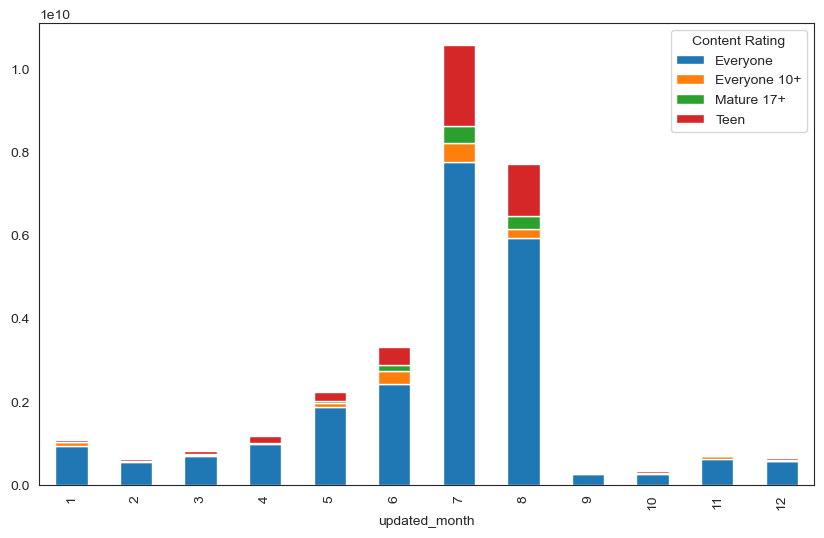

In [340]:
##Plot the stacked bar chart.

monthly.plot(kind = 'bar', stacked = 'True', figsize = [10, 6]);

In [ ]:
# aba yo bar analysis garna garo hun6
# so aba % ma lagera garne

In [346]:
monthly_perc = monthly[['Everyone', 'Everyone 10+', 'Mature 17+', 'Teen']].apply(lambda x: x/x.sum(), axis = 1)
monthly_perc

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,0.853262,0.097076,0.008945,0.040717
2,0.882747,0.032083,0.021077,0.064093
3,0.853576,0.037222,0.011184,0.098018
4,0.836553,0.020025,0.004520,0.138902
5,0.833785,0.052943,0.022463,0.090808
6,0.734200,0.096110,0.043939,0.125751
7,0.733766,0.043109,0.039609,0.183515
8,0.768496,0.027965,0.040554,0.162985
9,0.839928,0.080434,0.007101,0.072537


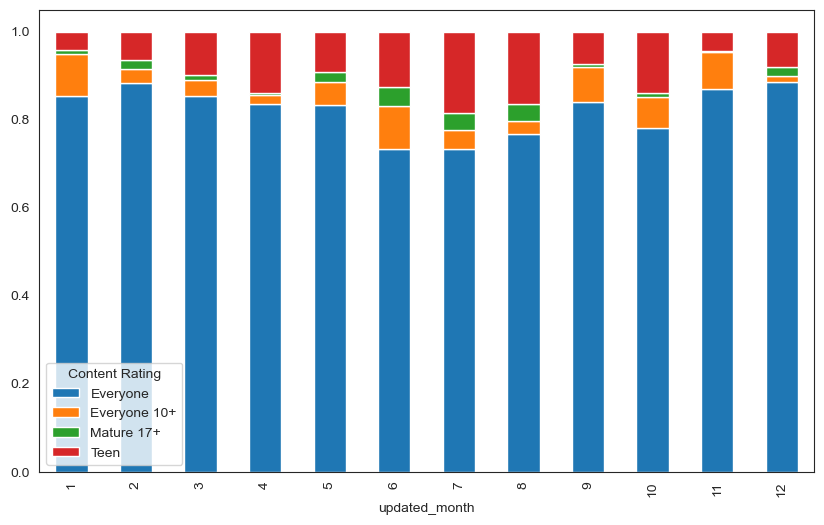

In [351]:
##Plot the stacked bar chart again wrt to the proportions.

monthly_perc.plot(kind = 'bar', stacked = 'True', figsize = [10,6]);
# y axis ko % ho installs ko
# x axis ko months ho

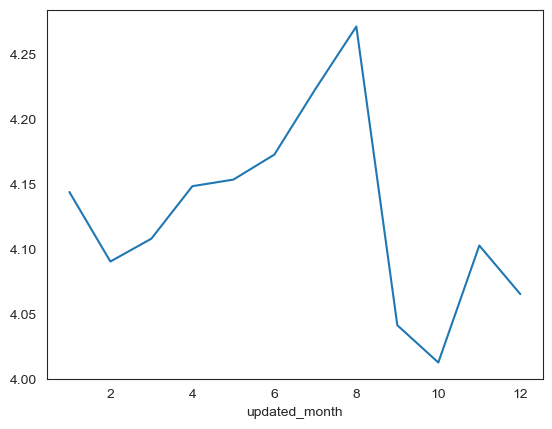

In [349]:
inp1.groupby('updated_month')['Rating'].mean().plot.line();
# ratings are high in 6-8 months


In [ ]:
# Summary of case study:

# First, you did a fair bit of data handling and cleaning - cleaning junk records, adding missing values, changing data types,
# remove outliers, etc.
# When you analysed the ratings using the histogram, you saw that they are skewed towards higher ratings.
# Using a bar chart, you saw that most of the apps belong to the Everyone category.
# You also observed a weak trend between the ratings and the size of the app, using a scatter-plot. You also briefly forayed to
# reg plots to understand its nuances.
# Using a pair-plot, you were able to see multiple scatter plots and draw several inferences, for example, price and rating
# having very weak trend, reviews and price being inversely related and so on.
# After that, you utilised estimator functions along with bar plots as well as box plots to observe the spread of ratings across
# the different Content Rating Categories. Here, your main observation was that Everyone category has a lot of apps having very
# low ratings.
# Finally, you created a heat map comparing the ratings across different Reviews and Content Rating buckets.

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [355]:
#Install plotly
# https://plotly.com/python/getting-started/



In [689]:
#Take the table you want to plot in a separate variable

res = inp1.groupby('updated_month')[['Rating']].mean()
res.reset_index(inplace = True)

In [357]:
#Import the plotly libraries

import plotly.express as px

In [371]:
#Prepare the plot

px.line(res, x = 'updated_month', y = 'Rating', title = 'Monthly average rating')

In [369]:
df=pd.read_csv("crypto.csv")
df2 = df.corr() # correlation banaune

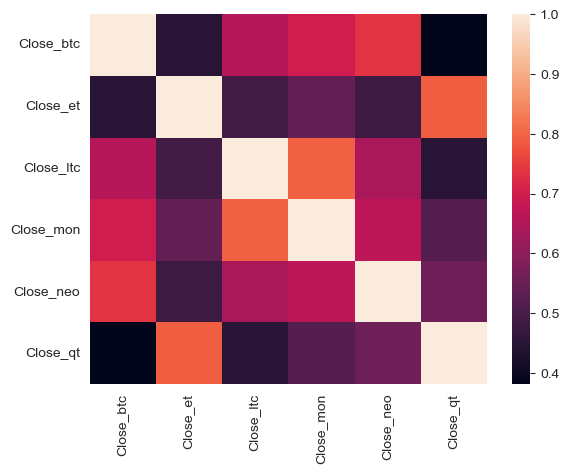

In [370]:
sns.heatmap(df2);

In [ ]:
# euta numerical variable vs 2 categorical variables

# Data Visualisation
# You can observe that the column Ship Mode has 4 categories - First Class, Second Class, Same Day and Standard Class, and 
# the Segment has 3 - Consumer, Home Office, Corporate.

# Now let's say you want to visualise how the average Profit varies across every Segment - Ship Mode combination 
# (like Consumer - First Class, Corporate - Standard Class and so on). Which of the following visualisations can be utilised 
# for the same?

# Heat map

# Feedback:
# Here, you're trying to analyse how a numerical variable changes across two categorical variables. So, you can create a
# table where the rows denote the Segment variable whereas the columns denote the Ship Mode. Thus, each cell would correspond
# to a particular Segment - Ship Mode pair and its value would be given by the corresponding average Profit for the same.
# Once this grid is created, you can easily use a heat map to plot the values and visualise how the average Profit changes
# across the various Segment - Ship Mode combinations.